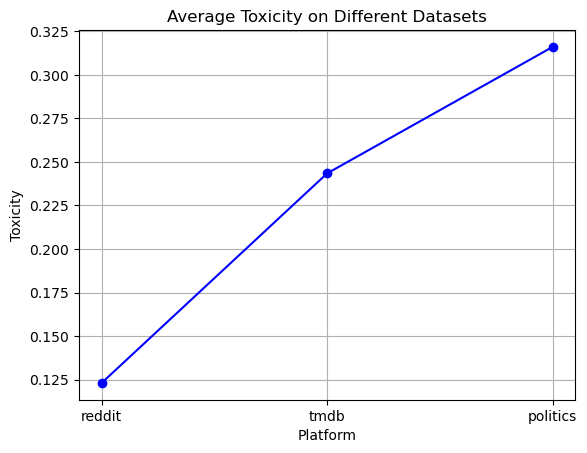

In [3]:
import matplotlib.pyplot as plt
import util.perspective as perspective
import util.hatespeech as hatespeech
import util.mongodb_client as mdc
import plotly.graph_objects as go

# Initialize counters
toxic_count = 0
total_comments = 0

reddit = []
tmdb = []
politics = []

reddit_collection = mdc.getCollection("movieData", "reddit")
tmdb_collection = mdc.getCollection("movieData", "tmdb_reviews")
politics_collection = mdc.getCollection("movieData", "politics_comments")

for col in reddit_collection.find().limit(2000):
    reddit.append(perspective.analyseComment(col["text"]))
for col in tmdb_collection.find().limit(2000):
    tmdb.append(perspective.analyseComment(col["content"]))
for col in politics_collection.find().limit(2000):
    politics.append(perspective.analyseComment(col["Comment"]))

avg1 = 0
avg2 = 0
avg3 = 0
for item in reddit:
    avg1 += item

for item in tmdb:
    avg2 += item

for item in politics:
    avg3 += item        


data = {
    'Platform': ['reddit', 'tmdb', 'politics'],
    'Toxicity': [avg1/100, avg2/100, avg3/100]
}

plt.plot(data['Platform'], data['Toxicity'], marker='o', linestyle='-', color='b')
plt.xlabel('Platform')
plt.ylabel('Toxicity')
plt.title('Average Toxicity on Different Datasets')
plt.grid(True)
plt.savefig('toxicity_plot.png', format='png', bbox_inches='tight')
plt.show()